In [1]:
import xarray as xr
import numpy as np
import random
from tqdm.notebook import tqdm
import matplotlib
import matplotlib.pyplot as plt 
from scipy import signal
from scipy import interpolate
from scipy import integrate
from scipy.fftpack import fft
from altimetry_tools import Filter, filterSpec1, Laplacian1D

Goal: construct a synthetic sla or velocity signal with know frequencies and apply smoothing/coarsening to quantify the loss of variance as a function of smoothing 

In [2]:
def coinFlip(p):    
    #perform the binomial distribution (returns 0 or 1)    
    result = np.random.binomial(1,p) 
       
    #return flip to be added to numpy array    
    return result

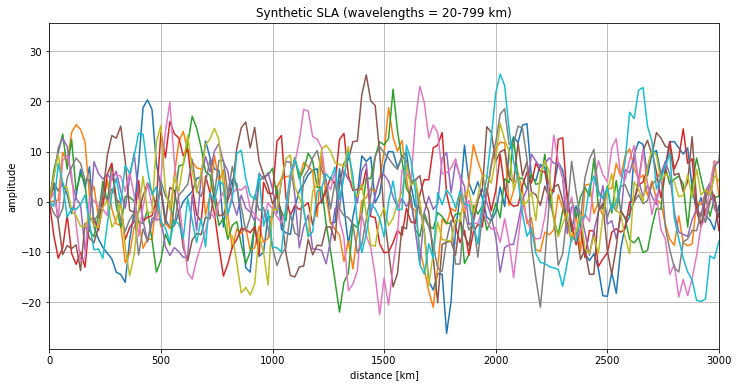

In [99]:
dx = 20                                    # grid spacing 
x = np.arange(0, 10000, dx)                # km grid 
lambs = np.arange(20, 800, 1)              # wavelengths 
n = len(lambs)
probability = .5
amps = np.linspace(0.1, 0.6, len(lambs))   # amplitudes 

cycles = 10
y_tot = np.nan * np.ones((cycles, len(x)))
for m in range(cycles):
    # coin flip to determine sign of contributing wavelength 
    sign = np.arange(n)
    for i in range(0, n):    
        sign[i] = coinFlip(probability) 
    sign[sign < 1] = -1    
    # random shuffle amplitudes 
    np.random.shuffle(amps)

    # build signal 
    y = np.nan * np.ones((len(lambs), len(x)))
    for i in range(len(lambs)):
        y[i, :] = sign[i] * amps[i] * np.sin((2 * np.pi / lambs[i]) * x)
    y_tot[m, :] = np.nansum(y, axis=0)

# separate, define three dominant wavelengths 
# noise
# mu = 0
# sigma = 0
# alt, specifiy one wavelength 
# a1 = 0.1
# l1 = 100   # wavelength1
# y1 = a1 * np.sin((2 * np.pi / l1) * x) + a2 * np.cos((2 * np.pi / l2) * x) + \
#     a3 * np.sin((2 * np.pi / l3) * x) + np.random.normal(mu, sigma, len(x))
# y2 = a1 * np.sin((1 * np.pi / l1) * x) + a2 * np.cos((1 * np.pi / l2) * x) + a3 * np.sin((1 * np.pi / l3) * x) + np.random.normal(mu, sigma, len(x))
# y = np.concatenate((y1[None, :], y2[None, :]), axis=0)

f, ax = plt.subplots(1, 1, figsize = (12, 6))
for i in range(cycles):
    ax.plot(x, y_tot[i, :])
ax.set_xlim([0, 3000])
ax.set_xlabel('distance [km]')
ax.set_ylabel('amplitude')
ax.set_title('Synthetic SLA (wavelengths = ' + str(np.nanmin(lambs)) + '-' + str(np.nanmax(lambs)) + ' km)')
ax.grid()
plt.show()

In [111]:
hor_grid_spacing = dx
# dx = hor_grid_spacing
L = 275                                          # = number of grid points contributing to each spectral estimate
# k = np.linspace(0, 1.0/(2.0*dx), np.int(L/2))

# -- wavelengths to filter to
# wavelengths = np.flip(np.concatenate((np.arange(60,350,10), np.array([400]))))
wavelengths = np.flip(np.arange(40,340,20))
# *** 
k_sub = 1/wavelengths
coarsening_factors = np.nan * np.ones(len(k_sub))
for i in range(len(k_sub)):
    thisone =  np.round((1/k_sub[i])/hor_grid_spacing)
    # print('smoothing to ' + str(thisone*hor_grid_spacing) + ' km')
    coarsening_factors[i] = thisone
coarse_fac = coarsening_factors*hor_grid_spacing
# print(coarse_fac)
print('filtering factors = ' + str(coarsening_factors) + ' ** = full width of boxcar **')

filtering factors = [16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.] ** = full width of boxcar **


In [112]:
# filtering factors 
LfB = coarsening_factors.copy()
LfT = LfB
LfG = LfB  # /np.sqrt(6)         # gaussian 

Using default N, N = 72 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 21 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 68 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 20 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 63 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 19 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 59 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 17 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 54 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 16 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 50 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 15 If d>2 or X is not pi then results might not be accurate.
Using default N,

Using default N, N = 45 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 13 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 41 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 12 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 36 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 11 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 32 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 10 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 27 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 8 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 23 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 7 If d>2 or X is not pi then results might not be accurate.
Using default N, N

Using default N, N = 20 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 63 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 19 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 59 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 17 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 54 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 16 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 50 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 15 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 45 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 13 If d>2 or X is not pi then results might not be accurate.
Using default N, N = 41 If d>2 or X is not pi then results might not be accurate.
Using default N,

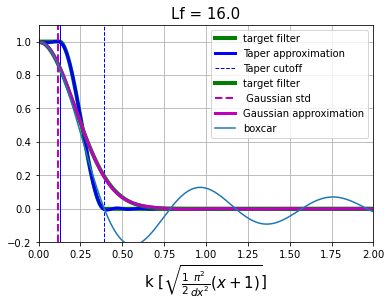

In [113]:

dxMin = 1
filtered_signal_T = np.nan * np.ones((cycles, len(coarsening_factors), len(x)))
filtered_signal_G = np.nan * np.ones((cycles, len(coarsening_factors), len(x)))
filtered_signal_B = np.nan * np.ones((cycles, len(coarsening_factors), len(x)))


for tt in tqdm(range(cycles)):
    # remember, coarsening factors ordered large scale to small scale 
    for i in range(len(coarsening_factors)):
        if (i < 1) & (tt < 1):  # (i>(len(coarsening_factors)-2)):  # (i<1) | 
            p,NL,sL,NB,sB = filterSpec1(dxMin,LfT[i],d=1,shape="Taper",X=np.pi,N=-1,plot_filter=1)
            pG,NL_G,sL_G,NB_G,sB_G = filterSpec1(dxMin,LfG[i],d=1,shape="Gaussian",X=np.pi,N=-1,plot_filter=1)
        else:
            p,NL,sL,NB,sB = filterSpec1(dxMin,LfT[i],d=1,shape="Taper",X=np.pi,N=-1,plot_filter=0)
            pG,NL_G,sL_G,NB_G,sB_G = filterSpec1(dxMin,LfG[i],d=1,shape="Gaussian",X=np.pi,N=-1,plot_filter=0)
        
        data = y_tot[tt, :].copy()
        land = np.where(np.isnan(data))[0]
        landMask = np.zeros(np.shape(data))
        landMask[land] = 1
    
        # generate wieghts 
        # TAPER 
        # L3 = (1/(np.int(dxMin)**2))*np.array([1,-2,1]) # The 1E4 in this line is 1/h^2 where h=0.01 is the assumed grid spacing.
        # L5 = (1/(np.int(dxMin)**2))*np.array([0,1,-2,1,0])
        # B = (1/(np.int(dxMin)**4))*np.array([1,-4,6,-4,1]) # The 1E8 in this line is 1/h^4
        # I3 = np.array([0,1,0])
        # I5 = np.array([0,0,1,0,0])
        # w = 1
        # for j in range(NL):
        #     w = np.convolve(I3 + (1/sL[j])*L3,w)
        # for j in range(NB):
        #     w = np.convolve(I5 + (2*np.real(sB[j])/np.abs(sB[j])**2)*L5 + (1/np.abs(sB[j])**2)*B, w)
        # outT = np.convolve(w, data)
    
        # laplacian filtering technique (TAPER)
        for ii in range(NL):
            tempL = Laplacian1D(data,landMask,dxMin)
            data = data + (1/sL[ii])*tempL # Update filtered field
        for ii in range(NB):
            tempL = Laplacian1D(data, landMask, dxMin)
            tempB = Laplacian1D(tempL, landMask, dxMin)
            data = data + (2*np.real(sB[ii])/(np.abs(sB[ii])**2))*tempL + (1/(np.abs(sB[ii])**2))*tempB
        outT = data.copy()
    
        # laplacian filtering technique (GAUSSIAN)
        data = y_tot[tt, :].copy()
        for ii in range(NL_G):
            tempL_G = Laplacian1D(data,landMask,dxMin)
            data = data + (1/sL_G[ii])*tempL_G # Update filtered field
        for ii in range(NB_G):
            tempL_G = Laplacian1D(data, landMask, dxMin)
            tempB_G = Laplacian1D(tempL_G, landMask, dxMin)
            data = data + (2*np.real(sB_G[ii])/(np.abs(sB_G[ii])**2))*tempL_G + (1/(np.abs(sB_G[ii])**2))*tempB_G
        outG = data.copy() 
           
        # APPLY BOXCAR 
        field = []
        field.append(y_tot[tt, :][None, :])
        out2 = Filter(20, 'boxcar', field, 1, np.int(LfB[i]))
        if (i < 1) & (tt < 1):  # (i>(len(coarsening_factors)-2)):
            d = 1
            xx = np.linspace(-1,1,10000)
            sMax = d*(np.pi/dxMin)**2
            k = np.sqrt((sMax/2)*(xx+1))
            F_Boxcar = lambda p: np.sinc(p*(LfB[i])/(2*np.pi))
            plt.plot(k, F_Boxcar(k), label='boxcar')
            plt.legend()
        # print(LfT[i])
        filtered_signal_T[tt, i, :] = outT  # outT[np.int((len(w)/2)):np.int((len(outT) - len(w)/2))+1] # out0[0][0][:]
        filtered_signal_G[tt, i, :] = outG # out1[0][0][:]
        filtered_signal_B[tt, i, :] = out2[0][0][:]

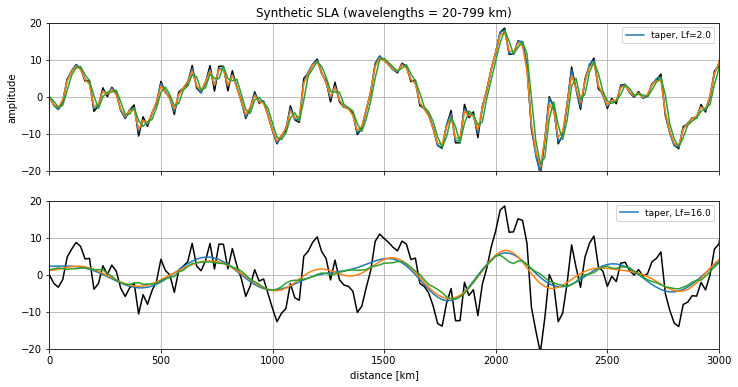

In [114]:
tt = 7
f, (ax1,ax2) = plt.subplots(2, 1, figsize = (12, 6), sharex=True)
ax1.plot(x, y_tot[tt, :], color='k')
ax2.plot(x, y_tot[tt, :], color='k')
for i in [-1]:  # range(0, len(coarsening_factors)):
    ax1.plot(x, filtered_signal_T[tt, i, :], label='taper, Lf=' + str(coarsening_factors[i]))
    ax1.plot(x, filtered_signal_G[tt, i, :])
    ax1.plot(x, filtered_signal_B[tt, i, :])
for i in [0]:  # range(0, len(coarsening_factors)):
    ax2.plot(x, filtered_signal_T[tt, i, :], label='taper, Lf=' + str(coarsening_factors[i]))
    ax2.plot(x, filtered_signal_G[tt, i, :])
    ax2.plot(x, filtered_signal_B[tt, i, :])
ax1.set_xlim([0, 3000])
ax1.set_ylim([-20, 20])
ax2.set_ylim([-20, 20])
ax2.set_xlabel('distance [km]')
ax1.set_ylabel('amplitude')
ax1.set_title('Synthetic SLA (wavelengths = ' + str(np.nanmin(lambs)) + '-' + str(np.nanmax(lambs)) + ' km)')
ax1.grid()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, fontsize=9)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, fontsize=9)
ax2.grid()
plt.show()

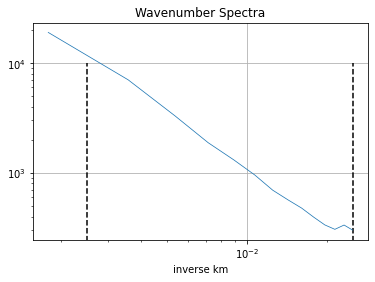

In [115]:
# -- SPECTRAL PARAMETERS
# -- mesoscale wavenumber band
meso = [70, 250]
# -- half width of window over which to compute spectra 
spec_win = dx*2*15  # should be at least as long meso[1], probably twice as large (full width)
# spec_win / 2 should be a multiple of dx 
# -- number of samples in each spectral estimate 
spec_win_ind = np.int(spec_win / hor_grid_spacing) 
dx = hor_grid_spacing
L = np.int(spec_win_ind) + 1 # = number of grid points contributing to each spectral estimate

# -- for proper estimate of variance (integrating under the spectra) add factor of 2pi later 
# k = np.arange(0, L/2, 1)/L/dx*2*np.pi
# meso_ind = np.where((1/(k/2/np.pi) >= meso[0]) & (1/(k/2/np.pi) <= meso[-1]))[0]
k = np.linspace(0, 1.0/(2.0*dx), np.int(L/2))  # *2*np.pi;

spec_loc_0 = np.arange(300, 9700, dx)
test_spec_11 = np.nan * np.ones((cycles, len(spec_loc_0), len(k)))
# loop over each cycle 
for tt in range(cycles):
    # loop over locations to estimate spectra 
    for i in range(len(spec_loc_0)):
        spec_loc = np.where(x == spec_loc_0[i])[0][0]
        this_sig_grid = y_tot[tt, (spec_loc - np.int(spec_win_ind/2)):(spec_loc + np.int(spec_win_ind/2))] \
            - np.nanmean(y_tot[tt, (spec_loc - np.int(spec_win_ind/2)):(spec_loc + np.int(spec_win_ind/2))])
        LL = len(this_sig_grid)
        test_spec_00 = fft(this_sig_grid, LL) * dx 
        test_spec_11[tt, i, :] = 2 * (k[1] - k[0]) * np.abs(test_spec_00[0:(np.int(LL/2))])**2
    
f, ax = plt.subplots()
ax.plot(k[1:], np.nanmean(np.nanmean(test_spec_11[:, :, 1:], axis=1), axis=0), linewidth=0.75)
ax.vlines(x=1/(np.nanmax(lambs)/2), ymin=0, ymax=10**4, color='k', linestyle='--')
ax.vlines(x=1/(dx*2), ymin=0, ymax=10**4, color='k', linestyle='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('inverse km')
ax.set_title('Wavenumber Spectra')
ax.grid()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

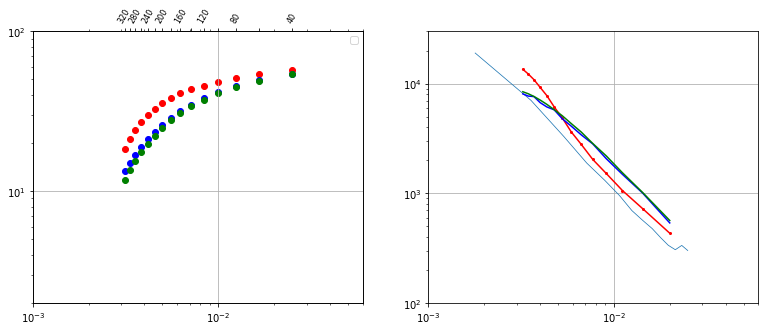

In [116]:
locs = np.arange(500, 9500, dx)
j = 20
x_loc = np.where(x == 5000)[0][0]
interval = np.int(8000/(2*dx))
f, (ax,ax3) = plt.subplots(1,2,figsize=(13,5), sharex=True)
ax2 = ax.twiny()
for i in range(len(coarsening_factors)):
    ax.scatter(1/(coarsening_factors[i]*hor_grid_spacing), \
               np.nanmean(np.nanmean(filtered_signal_T[:, i, x_loc-interval:x_loc+interval+1]**2, axis=1), axis=0), \
               color='r')
    ax.scatter(1/(coarsening_factors[i]*hor_grid_spacing), \
               np.nanmean(np.nanmean(filtered_signal_G[:, i, x_loc-interval:x_loc+interval+1]**2, axis=1), axis=0), \
               color='b')
    ax.scatter(1/(coarsening_factors[i]*hor_grid_spacing), \
               np.nanmean(np.nanmean(filtered_signal_B[:, i, x_loc-interval:x_loc+interval+1]**2, axis=1), axis=0), \
               color='g')

# ax.scatter(1/(coarsening_factors[i]*hor_grid_spacing), \
#             np.nanmean(filtered_signal_T[i, x_loc-interval:x_loc+interval+1]**2), color='r', label='taper')
# ax.scatter(1/(coarsening_factors[i]*hor_grid_spacing), \
#             np.nanmean(filtered_signal_G[i, x_loc-interval:x_loc+interval+1]**2), color='b', label='Gaussian')
# ax.scatter(1/(coarsening_factors[i]*hor_grid_spacing), \
#             np.nanmean(filtered_signal_B[i, x_loc-interval:x_loc+interval+1]**2), color='g', label='boxcar')
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1*10**(-3), 6*10**(-2)])
ax.set_ylim([2*10**0, 1*10**2])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=10)

ax2.set_xscale('log')
ax2.set_xticks(1/np.array(coarsening_factors*hor_grid_spacing))
bcl = []
for i in range(len(coarsening_factors)):
    if np.mod(i, 2):
        bcl.append('')
    else:
        # bcl.append(str(np.round(np.int(band_centers[i]))))
        bcl.append(str(np.round(np.int(coarsening_factors[i]*hor_grid_spacing))))
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(1/np.array(coarsening_factors*hor_grid_spacing))
ax2.set_xticklabels(bcl, rotation=60, fontsize=8)

# difference to compute 'spectra'
bin_centers = (coarsening_factors[1:] - coarsening_factors[0:-1])/2 + coarsening_factors[0:-1]
band_widths = 1/(coarsening_factors[1:]*hor_grid_spacing) - 1/(coarsening_factors[0:-1]*hor_grid_spacing)
this_spec = np.nanmean(np.nanmean(filtered_signal_T[:, :, x_loc-interval:x_loc+interval+1]**2, axis=2), axis=0)
this_spec_G = np.nanmean(np.nanmean(filtered_signal_G[:, :, x_loc-interval:x_loc+interval+1]**2, axis=2), axis=0) 
this_spec_B = np.nanmean(np.nanmean(filtered_signal_B[:, :, x_loc-interval:x_loc+interval+1]**2, axis=2), axis=0)

# plot 
ax3.plot(k[1:], np.nanmean(np.nanmean(test_spec_11[:, :, 1:], axis=1), axis=0), linewidth=0.75)
ax3.plot(1/(bin_centers*hor_grid_spacing), (this_spec[1:] - this_spec[0:-1])/band_widths, color='r')
ax3.scatter(1/(bin_centers*hor_grid_spacing), (this_spec[1:] - this_spec[0:-1])/band_widths, color='r', s=4)
ax3.plot(1/(bin_centers*hor_grid_spacing), (this_spec_G[1:] - this_spec_G[0:-1])/band_widths, color='b')
ax3.plot(1/(bin_centers*hor_grid_spacing), (this_spec_B[1:] - this_spec_B[0:-1])/band_widths, color='g')
ax3.set_ylim([1*10**(2), 3*10**4])
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid()
plt.show

In [77]:
np.shape(filtered_signal_T[:, i, x_loc-interval:x_loc+interval+1]**2)

(10, 15)

In [65]:
bin_centers

array([16.5, 15.5, 14.5, 13.5, 12.5, 11.5, 10.5,  9.5,  8.5,  7.5,  6.5,
        5.5,  4.5])

In [214]:
# OLD 
# Sharp Smoothing (from Ian)
def getWeights(n):
    w = np.zeros(n+1) # initialize weights
    for i in range(n):
        integrand = lambda k: 2*(F(k)-1)*(np.cos((i+1)*k)-1)
        w[i] = integrate.quad(integrand,0,np.pi)[0]
    A = 2*np.pi*(np.eye(n) + 2)
    w[1:] = np.linalg.solve(A,w[0:n])
    w[0] = 1 - 2*np.sum(w[1:])
    return w

In [215]:
grid_spacing = x[2] - x[1]
print('grid spacing = ' + str(grid_spacing))
x_samp = 4; # coarsening factor = desired (coarser resolution) / current grid resolution 
print('coarsening factor = ' + str(x_samp))
print('coarsened grid spacing = ' + str(grid_spacing*x_samp))
F = interpolate.PchipInterpolator(np.array([0,1/x_samp,np.pi/x_samp,np.pi]),np.array([1,1,0,0]))

grid spacing = 1
coarsening factor = 4
coarsened grid spacing = 4


In [221]:
# filter width selection 
# define 5 coarsening regimens, coarsening factor = desired (coarser resolution) / current grid resolution 
x0 = np.array([5, 10, 20, 30, 40, 50, 100])  # for a __km grid, these correspond to x0*grid_spacing coarsening 
jj = np.nan * np.ones(len(x0))
# find number of grid cells needed (what is the best width for the filter)
for i in range(len(x0)):
    x_i = x0[i]
    F = interpolate.PchipInterpolator(np.array([0,1/x_i,np.pi/x_i,np.pi]),np.array([1,1,0,0]))
    weight_prev = getWeights(1)
    print('x = ' + str(x_i))
    for j in range(2, 50):
        this_weight = getWeights(j)
        wd = np.sum(np.abs(this_weight[0:2] - weight_prev[0:2])/np.abs(weight_prev[0:2]))
        # print(wd)
        if wd < 0.04:
            jj[i] = j
            print(str(j) + ' ' + str(getWeights(j)[0:4]))
            print(str(j - 1) + ' ' + str(getWeights(j - 1)[0:4]))
            break
        weight_prev = this_weight   

x = 5
7 [0.12326621 0.11894309 0.10656263 0.08778599]
6 [0.12327988 0.11895676 0.1065763  0.08779966]
x = 10
12 [0.06191145 0.06136636 0.05974989 0.05711769]
11 [0.06275216 0.06220706 0.0605906  0.0579584 ]
x = 20
20 [0.03239987 0.03233158 0.03212732 0.03178884]
19 [0.03300869 0.0329404  0.03273614 0.03239767]
x = 30
27 [0.02260473 0.02258449 0.02252384 0.02242303]
26 [0.02301627 0.02299603 0.02293538 0.02283457]
x = 40
32 [0.01807068 0.01806214 0.01803654 0.01799393]
31 [0.01841334 0.0184048  0.0183792  0.01833659]
x = 50
36 [0.01547096 0.01546659 0.01545348 0.01543164]
35 [0.01576924 0.01576486 0.01575175 0.01572992]
x = 100
45 [0.01135297 0.01135242 0.01135078 0.01134805]
44 [0.01158463 0.01158408 0.01158244 0.01157971]


In [222]:
# smooth for each pass (each signal) and loop over various smoothing options
smooth_signal = np.nan * np.ones((np.shape(y_tot[None, :])[0], len(x0), np.shape(y)[1]))
for i in range(len(x0)):  # loop over smoothing choices 
    n = np.int(jj[i])
    filter_width = 2*n + 1
    # two sided filter 
    x_i = x0[i]
    F = interpolate.PchipInterpolator(np.array([0,1/x_i,np.pi/x_i,np.pi]),np.array([1,1,0,0]))
    filter0 = np.concatenate((np.flip(getWeights(n))[0:-1], getWeights(n)))
    for p in range(np.shape(y_tot[None, :])[0]):  # loop over each pass 
        this_signal = y_tot  # y[p, :]
        for j in range(len(this_signal)):  # loop over each grid point and smooth. 
            if j < n:  # edge0
                sig_partial = np.concatenate((np.zeros(n - j), this_signal[0:(j + n + 1)]))
                smooth_signal[p, i, j] = np.nansum(filter0 * sig_partial)
            elif j >= (len(this_signal) - n):  # edge1
                sig_partial = np.concatenate((this_signal[(j - n):], np.zeros(filter_width - len(this_signal[(j - n):]))))
                smooth_signal[p, i, j] = np.nansum(filter0 * sig_partial)    
            else:
                smooth_signal[p, i, j] = np.nansum(filter0 * this_signal[(j - n):(j + n + 1)])

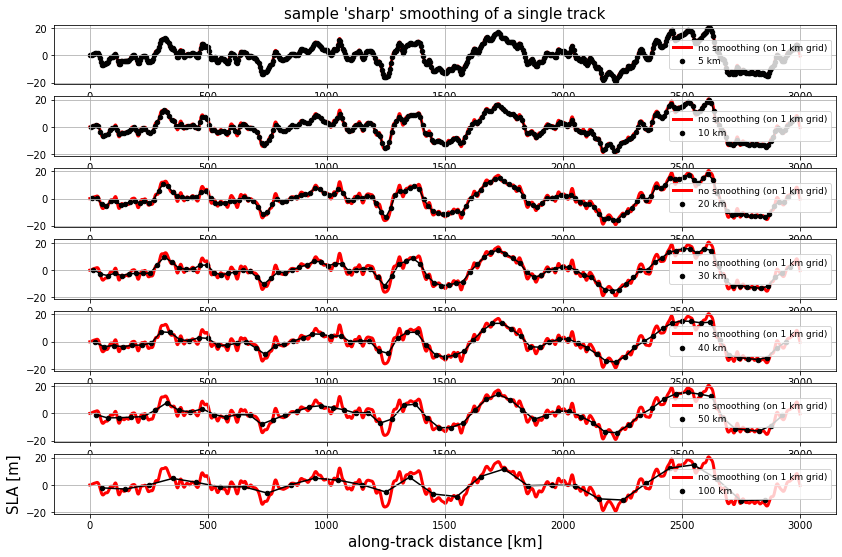

In [223]:
# plot single pass with smoothings 
p = 0
cmap = matplotlib.cm.get_cmap('copper')
fig0, ax = plt.subplots(len(x0), 1, figsize = (14, 9))
coarse_grid_out = []
coarse_sig_out = []
for i in range(len(x0)):
    ax[i].plot(x, y_tot, color='r', label='no smoothing (on ' + str(grid_spacing) + ' km grid)', linestyle='-', linewidth=3, zorder=0)
    # ax.plot(x, smooth_signal[p, i, :], linestyle='-', color=cmap(i/len(x0)),
    #         label='effective resolution = ' + str(grid_spacing*x0[i]) + 'km', linewidth=1.5)
    # if i == len(x0) - 1:
    # coarse_sig = np.interp(d_grid_coarse, x, smooth_signal[p, i, :])
    
    # define coarse grid 
    d_grid_coarse = np.arange(0, x[-1], x0[i]*grid_spacing)
    coarse_grid_c = d_grid_coarse[0:-1] + (d_grid_coarse[1] - d_grid_coarse[0])/2
    # average all points in bins with width equal to coarser grid 
    coarse_sig_j = []
    for j in range(1, len(d_grid_coarse)):
        coarse_sig_j.append(np.nanmean(smooth_signal[p, i,(x > d_grid_coarse[j - 1]) & (x < d_grid_coarse[j])]))
    coarse_grid_out.append(coarse_grid_c)
    coarse_sig_out.append(coarse_sig_j)
    
    ax[i].plot(coarse_grid_c, coarse_sig_j, color='k', zorder=1)  # cmap(i/len(x0))
    ax[i].scatter(coarse_grid_c, coarse_sig_j, s=20, color='k', zorder=1, label=str(x0[i]*grid_spacing) + ' km')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, labels, fontsize=9)
    ax[i].grid()
ax[i].set_xlabel('along-track distance [km]', fontsize=15)
ax[i].set_ylabel('SLA [m]', fontsize=15)
ax[0].set_title("sample 'sharp' smoothing of a single track", fontsize=15)
plt.show()

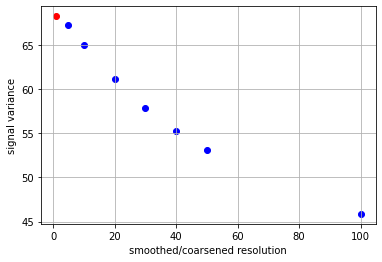

In [225]:
f, ax = plt.subplots()
ax.scatter(grid_spacing, np.var(y_tot), color='r')
for i in range(len(x0)):
    ax.scatter(x0[i]*grid_spacing, np.var(coarse_sig_out[i]), color='b')
ax.set_xlabel('smoothed/coarsened resolution')
ax.set_ylabel('signal variance')
ax.grid()
plt.show()

599
299
149
99
74
59
29


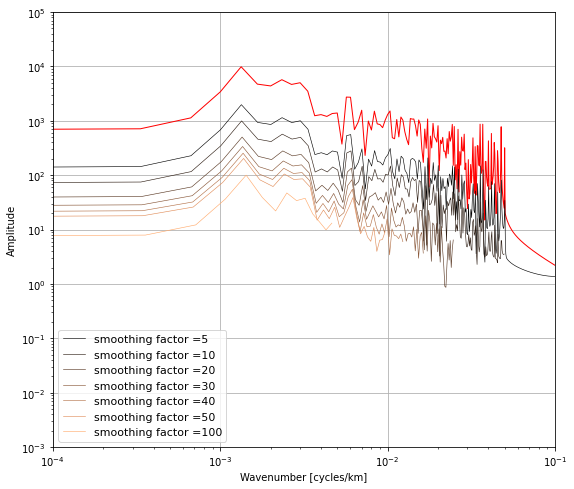

In [226]:
# plot 
from scipy.fftpack import fft
from scipy import signal
fig, ax = plt.subplots(1, 1, figsize = (9, 8))
ax.set_ylabel("Amplitude")
ax.set_xlabel("Wavenumber [cycles/km]")

T = x[1] - x[0]  # sampling interval
N = x.size 
f = np.linspace(0, 1 / T, N)  # 1/T = wavenumber
window = signal.slepian(N, width=0.2)  
ywf_grid = fft((y_tot - np.nanmean(y_tot)), N)  # fft and remove mean 
ax.plot(f[:N // 2], np.abs(ywf_grid[:N // 2]), color='r', linewidth=1) 

for i in range(len(x0)):
    T = coarse_grid_out[i][1] - coarse_grid_out[i][0]  # sampling interval
    N = coarse_grid_out[i].size 
    print(N)
    f = np.linspace(0, 1 / T, N)  # 1/T = wavenumber
    window = signal.slepian(N, width=0.2)  
    ywf_grid = fft((coarse_sig_out[i] - np.nanmean(coarse_sig_out[i])), N)  # fft and remove mean 
    
    ax.plot(f[:N // 2], np.abs(ywf_grid[:N // 2]), 
            color=cmap(i/len(x0)), linewidth=0.6, label='smoothing factor =' + str(x0[i])) 
       
ax.set_ylim([10**(-3), 10**(5)])
ax.set_xlim([10**(-4), 10**(-1)])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=11)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
plt.show()